## Notes du cours classification

bunning
Bin 1 : [18, 22, 25]  
Bin 2 : [30, 31, 34, 38]  
Bin 3 : [42, 47, 51]

Binning par valeurs moyennées (mean binning) :
Chaque valeur dans un bin est remplacée par la moyenne du bin :

Bin 1 (moyenne : 21.7) → valeurs remplacées par 21.7

Bin 2 (moyenne : 33.25) → valeurs remplacées par 33.25

Bin 3 (moyenne : 46.67) → valeurs remplacées par 46.67



#### ▶ Les méthodes de partitionnement non hiérarchiques.
## → K-means


#### 🔹 Méthode emblématique : K-means
#### ⚙️ Principe :
L'algorithme K-means cherche à :

Choisir k centres initiaux (aléatoires ou selon une méthode comme k-means++).

Répartir les points dans k clusters en fonction de leur distance aux centres.

Recalculer les centres comme la moyenne des points dans chaque cluster.

Répéter jusqu’à stabilisation.

#### 📉 Fonction objective :
Minimiser la somme des distances au carré des points à leur centre de cluster.

$$argmin_𝐶
∑_{𝑖=1}^k
∑_{
𝑥
∈
𝐶} ∥𝑥−𝜇_𝑖∥^2
$$

#### ✅ Avantages :
Simple et rapide

Efficace sur des données bien séparées sphériquement

#### ⚠️ Limites :
Nécessite de spécifier k à l'avance

Sensible aux valeurs aberrantes

Mauvais résultats si les clusters ne sont pas sphériques ou de tailles très différentes

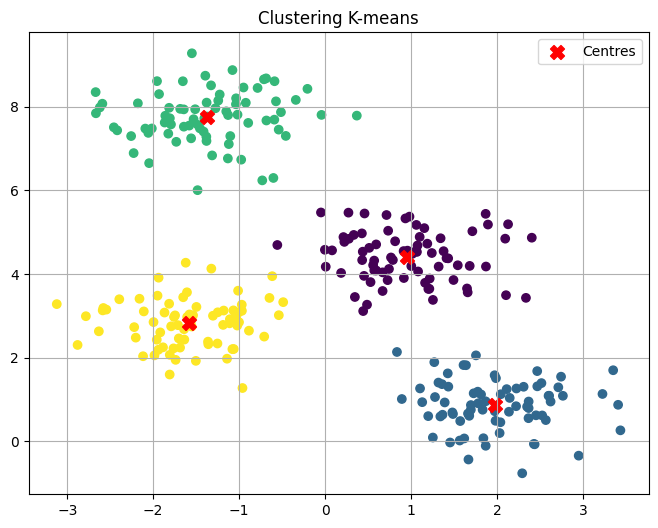

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# Génération de données artificielles
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.6, random_state=0)

# Appliquer K-means
kmeans = KMeans(n_clusters=4, random_state=0, n_init=10)
kmeans.fit(X)
labels = kmeans.labels_
centers = kmeans.cluster_centers_

# Visualisation
plt.figure(figsize=(8,6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=100, marker='X', label='Centres')
plt.title("Clustering K-means")
plt.legend()
plt.grid(True)
plt.show()


#### 🌳 Méthodes de partitionnement hiérarchique
#### 1. Méthode ascendante (agglomérative)
Idée : chaque observation commence dans son propre cluster.

À chaque étape : on fusionne les deux clusters les plus proches.

Fin : tous les éléments sont regroupés dans un seul cluster global.

🔁 Processus :

Initialiser n clusters (un par individu).

Calculer les distances entre tous les clusters.

Fusionner les deux plus proches.

Répéter jusqu’à 1 seul cluster.

✅ Très utilisée car simple, intuitive et visualisable.

#### 2. Méthode descendante (divisive)
Idée : on commence avec tous les individus dans un même cluster.

À chaque étape : on divise le cluster en deux sous-groupes.

Fin : chaque individu est isolé.

🧠 Moins utilisée que la méthode ascendante, car elle est plus coûteuse en pratique (complexité algorithmique plus élevée).

 #### 1. CAH – Classification Ascendante Hiérarchique (Agglomérative)

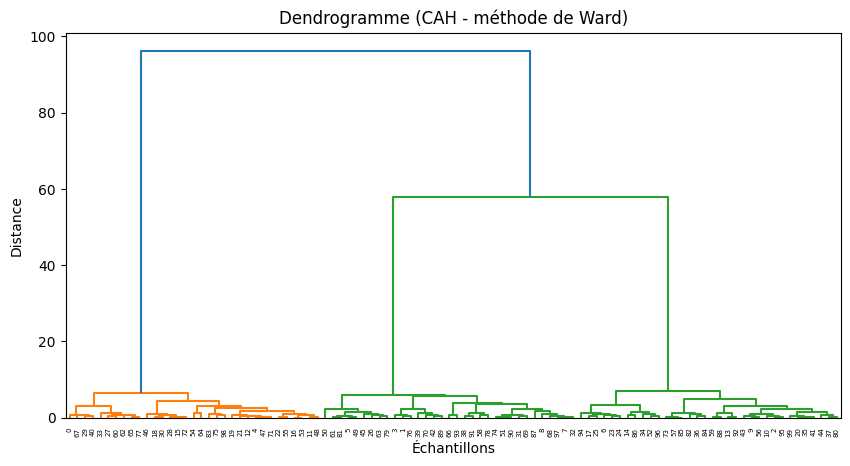

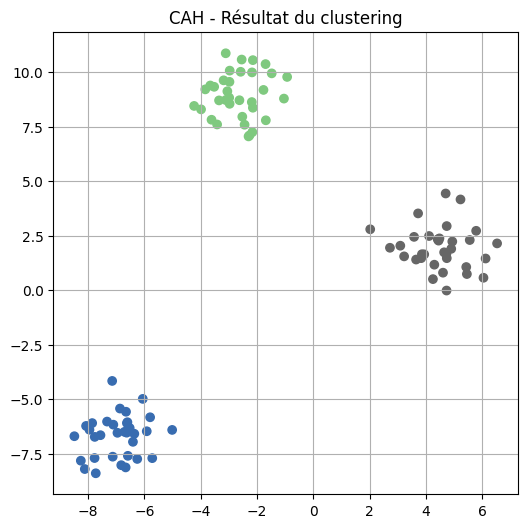

In [3]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

# Générer des données
X, _ = make_blobs(n_samples=100, centers=3, cluster_std=1.0, random_state=42)

# Afficher le dendrogramme
plt.figure(figsize=(10, 5))
Z = linkage(X, method='ward')
dendrogram(Z)
plt.title("Dendrogramme (CAH - méthode de Ward)")
plt.xlabel("Échantillons")
plt.ylabel("Distance")
plt.show()

# Appliquer le clustering hiérarchique
model = AgglomerativeClustering(n_clusters=3, linkage='ward')
labels = model.fit_predict(X)

# Affichage des clusters
plt.figure(figsize=(6, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='Accent')
plt.title("CAH - Résultat du clustering")
plt.grid(True)
plt.show()


#### 2. CDH – Classification Descendante Hiérarchique (Divisive)
scikit-learn ne fournit pas directement d'implémentation de la CDH. Cependant, vous pouvez utiliser la librairie scipy.cluster.hierarchy ou une méthode personnalisée. Voici un exemple avec la méthode DIANA (Divisive Analysis Clustering) via la bibliothèque divik (si vous voulez l'installer via pip install divik).

Mais comme elle est peu utilisée, voici une alternative simple avec un algorithme récursif basé sur KMeans

In [4]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt


def divisive_clustering(X, depth=2):
    n = len(X)
    labels = np.zeros(n, dtype=int)
    cluster_indices = [np.arange(n)]  # indices des points dans X
    current_label = 1

    for d in range(depth):
        new_cluster_indices = []
        for indices in cluster_indices:
            if len(indices) < 2:
                continue
            X_cluster = X[indices]
            kmeans = KMeans(n_clusters=2, random_state=42).fit(X_cluster)
            for i in range(2):
                sub_idx = indices[kmeans.labels_ == i]
                labels[sub_idx] = current_label
                new_cluster_indices.append(sub_idx)
                current_label += 1
        cluster_indices = new_cluster_indices
    return labels


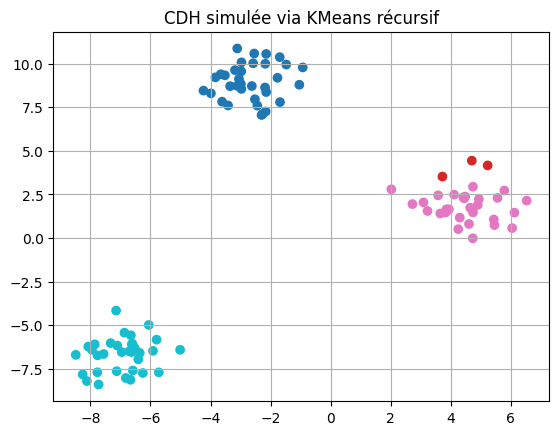

In [5]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

#X, _ = make_blobs(n_samples=100, centers=1, cluster_std=2.5, random_state=42)
X, _ = make_blobs(n_samples=100, centers=3, cluster_std=1.0, random_state=42)
labels = divisive_clustering(X, depth=2)

plt.scatter(X[:, 0], X[:, 1], c=labels, cmap="tab10")
plt.title("CDH simulée via KMeans récursif")
plt.grid(True)
plt.show()


La classification descendante hiérarchique (CDH) basée sur des divisions binaires (comme dans l’exemple précédent avec KMeans(n_clusters=2)) génère un nombre de clusters en puissance de 2 : 2, 4, 8, etc.

Mais si tu veux obtenir exactement 3 clusters, voici une solutions pratiques :

#### ✅ Option 1 – Variante "forcée" à 3 clusters
On modifie légèrement la logique pour arrêter la division quand on a 3 groupes distincts (et pas forcément une profondeur fixe) :

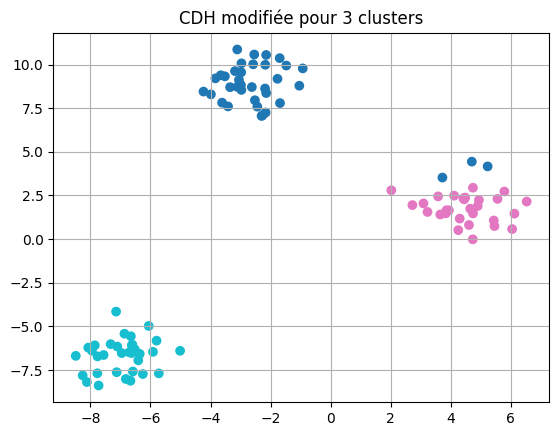

In [6]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

def divisive_clustering_k(X, target_k=3):
    n = len(X)
    labels = np.zeros(n, dtype=int)
    clusters = [(np.arange(n), 0)]  # (indices, label)
    next_label = 1

    while len(clusters) < target_k:
        # Trouver le cluster le plus grand à diviser
        clusters.sort(key=lambda x: len(x[0]), reverse=True)
        idx_to_split, old_label = clusters.pop(0)
        X_cluster = X[idx_to_split]
        if len(idx_to_split) < 2:
            continue
        kmeans = KMeans(n_clusters=2, random_state=42).fit(X_cluster)

        for i in range(2):
            sub_idx = idx_to_split[kmeans.labels_ == i]
            labels[sub_idx] = next_label
            clusters.append((sub_idx, next_label))
            next_label += 1

    return labels

# Jeu de données
X, _ = make_blobs(n_samples=100, centers=3, cluster_std=1.0, random_state=42)

# Appliquer CDH pour obtenir 3 clusters
labels = divisive_clustering_k(X, target_k=3)

# Affichage
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap="tab10")
plt.title("CDH modifiée pour 3 clusters")
plt.grid(True)
plt.show()


#### DBSCAN (Density-Based Spatial Clustering of Applications with Noise).


#### 🧠 DBSCAN : Principes clés
#### 📌 Objectif :
Identifier des clusters de forme quelconque en se basant sur la densité locale des points, tout en détectant les outliers (bruit).

#### ⚙️ Paramètres principaux :
ε (epsilon) : rayon maximal autour d’un point pour considérer ses voisins.

MinPts : nombre minimum de points dans un ε-voisinage pour qu’un point soit considéré comme "noyau".

#### 🧩 Types de points selon DBSCAN :
Type de point	Définition
Point noyau	≥ MinPts voisins dans un rayon ε
Point bordure	Moins de MinPts mais voisin d’un point noyau
Bruit (outlier)	Isolé, ni noyau ni bordure

#### 🔁 Algorithme DBSCAN
Choisir un point non encore visité.

Si c'est un point noyau : créer un nouveau cluster, étendre ce cluster avec ses voisins densément connectés.

Sinon, le marquer comme bruit ou point bordure.

Répéter jusqu’à traitement de tous les points.

#### ✅ Avantages
Pas besoin de spécifier le nombre de clusters (contrairement à K-Means).

Peut détecter des clusters de forme arbitraire.

Gère bien les outliers.

#### ❌ Inconvénients
Sensible aux paramètres ε et MinPts.

Moins performant dans des données de densité variable.

Moins adapté aux données très haute dimension (curse of dimensionality).



In [62]:
#pip install --upgrade numpy scipy scikit-learn

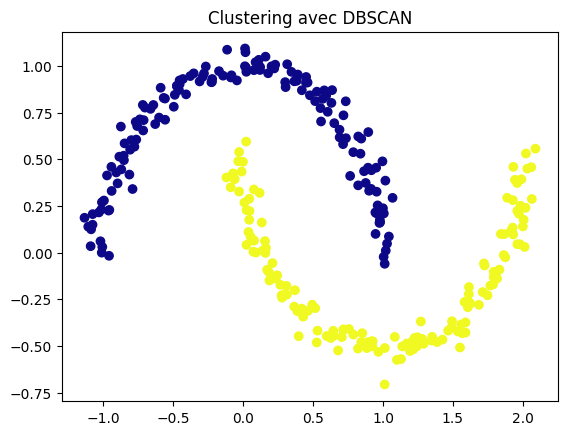

In [7]:
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

# Jeu de données non linéaire
X, _ = make_moons(n_samples=300, noise=0.05)

# Clustering DBSCAN
db = DBSCAN(eps=0.2, min_samples=5).fit(X)
labels = db.labels_

# Visualisation
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='plasma')
plt.title("Clustering avec DBSCAN")
plt.show()


In [64]:
#pip install "numpy<2"

In [65]:
import numpy as np
import scipy
import sklearn
print(np.__version__, scipy.__version__, sklearn.__version__)


1.26.4 1.15.3 1.6.1


In [66]:
#pip uninstall numpy matplotlib scipy scikit-learn -y


In [67]:
#pip install "numpy<2" matplotlib scipy scikit-learn

#### ✅ Modèles de mélange de lois
On suppose que les données proviennent de 
𝐾
K distributions :

$$ 𝑝
(
𝑥
)
=
∑
𝑘
=
1
𝐾
𝜋
𝑘
⋅
𝑝
𝑘
(
𝑥
∣
𝜃
𝑘
)
p(x)= 
k=1
∑
K
​
 π 
k
​
 ⋅p 
k
​
 (x∣θ 
k
​
 )
𝜋
𝑘
π 
k
​
  : poids du groupe 
𝑘
k (somme à 1),

𝑝
𝑘
p 
k
​
  : loi de probabilité du groupe (souvent une gaussienne),

𝜃
𝑘
θ 
k
​
  : paramètres de cette loi (moyenne, covariance...).
$$
#### ⚙️ Méthodes d’estimation
#### 1. EM (Expectation-Maximization)
C'est l’algorithme le plus utilisé pour apprendre les modèles de mélanges gaussiens (GMM) :

E-step (Expectation) : calcule les probabilités d’appartenance de chaque point à chaque cluster (pondérations).

M-step (Maximization) : met à jour les paramètres des lois (moyennes, covariances, poids) en maximisant la vraisemblance.

##### ➡️ C’est une méthode itérative, qui converge vers un optimum local.

#### 2. SEM (Stochastic EM)
Version stochastique de l’EM :

Introduit de l’aléa dans l'étape E (au lieu de calculer une espérance, on échantillonne une affectation de cluster),

Peut mieux explorer l’espace des solutions (utile pour éviter des minimums locaux),

Parfois plus rapide pour des très grands ensembles de données.



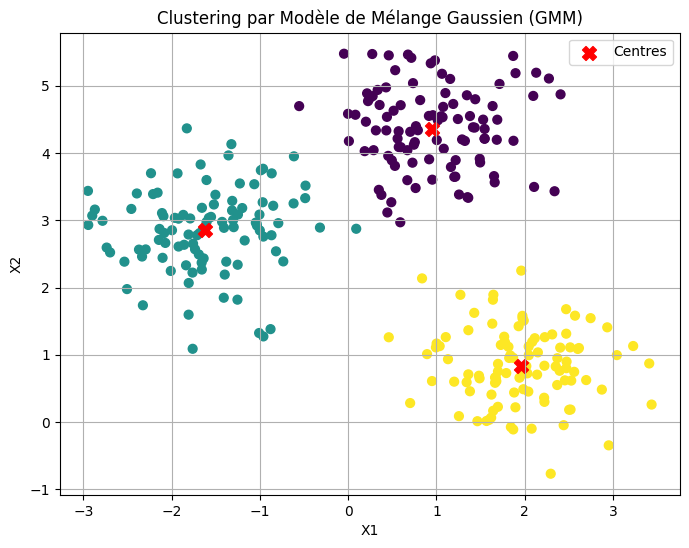

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.mixture import GaussianMixture

# 1. Générer des données synthétiques
X, y_true = make_blobs(n_samples=300, centers=3, cluster_std=0.60, random_state=0)

# 2. Appliquer Gaussian Mixture Model
gmm = GaussianMixture(n_components=3, covariance_type='full', random_state=42)
gmm.fit(X)

# 3. Prédire les étiquettes (probabiliste)
labels = gmm.predict(X)
probs = gmm.predict_proba(X)  # optionnel : obtenir les probabilités d’appartenance

# 4. Visualiser les clusters
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis')
plt.title("Clustering par Modèle de Mélange Gaussien (GMM)")
plt.xlabel("X1")
plt.ylabel("X2")

# Afficher les centres des clusters
centers = gmm.means_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=100, marker='X', label='Centres')
plt.legend()
plt.grid(True)
plt.show()


 #### Objectif : Montrer que GMM suppose des distributions elliptiques (gaussiennes), donc inadapté à des formes complexes (comme des croissants de lunes).

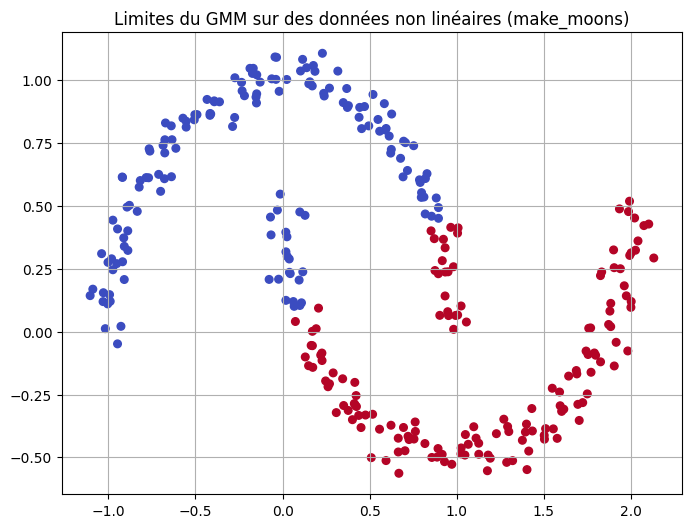

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.mixture import GaussianMixture

# Générer les données en forme de deux lunes
X, y_true = make_moons(n_samples=300, noise=0.05, random_state=42)

# Appliquer GMM avec 2 composantes
gmm = GaussianMixture(n_components=2, covariance_type='full', random_state=42)
gmm.fit(X)
labels = gmm.predict(X)

# Visualisation
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='coolwarm', s=30)
plt.title("Limites du GMM sur des données non linéaires (make_moons)")
plt.grid(True)
plt.show()


#### Résultat attendu :
Les deux "lunes" ne seront pas bien séparées.

Le GMM tend à créer des frontières elliptiques, ce qui ne colle pas aux formes courbées.

#### ❌ Limite du GMM :
Le GMM fonctionne mal lorsque les clusters ne suivent pas une distribution gaussienne multivariée. Il échoue donc sur les structures non convexes ou en spirale.

## Inertie :

Inertie totale     : 19884.40
Inertie intra-classe : 204.07
Inertie inter-classe : 19680.33
Somme intra + inter  : 19884.40


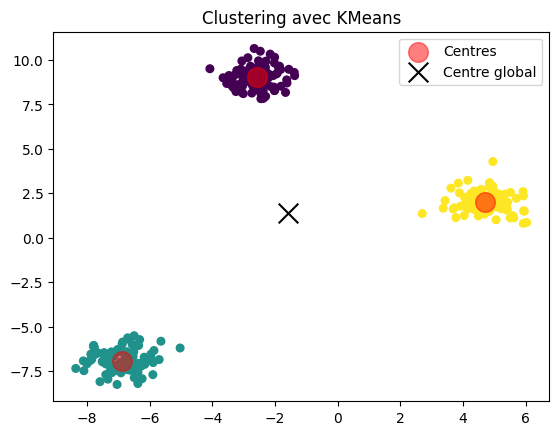

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# 1. Générer des données simulées
X, y_true = make_blobs(n_samples=300, centers=3, cluster_std=0.60, random_state=42)

# 2. Appliquer KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X)
centroids = kmeans.cluster_centers_

# 3. Calcul du centre global
G = np.mean(X, axis=0)

# 4. Inertie totale
inertie_totale = np.sum(np.linalg.norm(X - G, axis=1) ** 2)

# 5. Inertie intra-classe
inertie_intra = 0
for k in range(3):
    cluster_points = X[labels == k]
    G_k = centroids[k]
    inertie_intra += np.sum(np.linalg.norm(cluster_points - G_k, axis=1) ** 2)

# 6. Inertie inter-classe
inertie_inter = 0
for k in range(3):
    n_k = np.sum(labels == k)
    G_k = centroids[k]
    inertie_inter += n_k * np.sum((G_k - G) ** 2)

# 7. Affichage des résultats
print(f"Inertie totale     : {inertie_totale:.2f}")
print(f"Inertie intra-classe : {inertie_intra:.2f}")
print(f"Inertie inter-classe : {inertie_inter:.2f}")
print(f"Somme intra + inter  : {inertie_intra + inertie_inter:.2f}")

# 8. Visualisation
plt.scatter(X[:, 0], X[:, 1], c=labels, s=30, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, alpha=0.5, label='Centres')
plt.scatter(G[0], G[1], c='black', s=200, marker='x', label='Centre global')
plt.title("Clustering avec KMeans")
plt.legend()
plt.show()

## L’objectif de la méthode des k-means est de minimiser l’inertie intra classes

# formule d’inertie intra-classe (ou inertie de groupe) pour un découpage de données en deux sous-groupes gp1 et gp2.

On calcule le contraste relatif en fonction du nombre de variables retenu :
$$gn(C) =\sum_{X
i∈gp1}
∥xi − \bar{x}_1∥^2 +
\sum_{X
i∈gp2}
∥xi − \bar{x}_2∥^2
 .$$

In [11]:
import numpy as np

# Données (exemple)
X = np.random.rand(100, 2)

# Supposons deux sous-groupes par des labels
labels = np.random.choice([0, 1], size=100)

# Séparation des groupes
gp1 = X[labels == 0]
gp2 = X[labels == 1]

# Centroides
x1_bar = np.mean(gp1, axis=0)
x2_bar = np.mean(gp2, axis=0)

# Inerties intra-classe
inertia_gp1 = np.sum(np.linalg.norm(gp1 - x1_bar, axis=1)**2)
inertia_gp2 = np.sum(np.linalg.norm(gp2 - x2_bar, axis=1)**2)

# Inertie totale
gn_C = inertia_gp1 + inertia_gp2
print("Inertie intra-classe :", gn_C)


Inertie intra-classe : 14.13809587532397


# Variante K-medoids

In [12]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids
import matplotlib.pyplot as plt

# Données synthétiques
X, _ = make_blobs(n_samples=300, centers=3, cluster_std=0.60, random_state=0)

# k-means
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)

# k-medoids
kmedoids = KMedoids(n_clusters=3, random_state=0).fit(X)

# Affichage
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
axs[0].scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap='viridis')
axs[0].scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color='red', marker='X', s=200)
axs[0].set_title("K-Means (centres = moyennes)")

axs[1].scatter(X[:, 0], X[:, 1], c=kmedoids.labels_, cmap='viridis')
axs[1].scatter(X[kmedoids.medoid_indices_, 0], X[kmedoids.medoid_indices_, 1], color='blue', marker='D', s=200)
axs[1].set_title("K-Medoids (centres = observations)")

plt.show()


ModuleNotFoundError: No module named 'sklearn_extra'

## Variente Hartigan & Wong

In [13]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans as LloydKMeans
from sklearn_extra.cluster import KMeans as HartiganKMeans

# Générer des données
X, y_true = make_blobs(n_samples=300, centers=3, cluster_std=0.60, random_state=42)

# Appliquer KMeans standard (Lloyd)
lloyd = LloydKMeans(n_clusters=3, init='k-means++', n_init=10, random_state=42)
labels_lloyd = lloyd.fit_predict(X)

# Appliquer Hartigan & Wong
hartigan = HartiganKMeans(n_clusters=3, init='k-means++', algorithm='full', n_init=10, random_state=42)
labels_hartigan = hartigan.fit_predict(X)

# Visualiser les résultats
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

axs[0].scatter(X[:, 0], X[:, 1], c=labels_lloyd, cmap='viridis', s=30)
axs[0].scatter(lloyd.cluster_centers_[:, 0], lloyd.cluster_centers_[:, 1], c='red', s=200, marker='X')
axs[0].set_title("KMeans - Lloyd")

axs[1].scatter(X[:, 0], X[:, 1], c=labels_hartigan, cmap='viridis', s=30)
axs[1].scatter(hartigan.cluster_centers_[:, 0], hartigan.cluster_centers_[:, 1], c='red', s=200, marker='X')
axs[1].set_title("KMeans - Hartigan & Wong")

plt.show()


ModuleNotFoundError: No module named 'sklearn_extra'

# Le coin python 1:

In [14]:
import numpy as np
from sklearn.cluster import KMeans
#from sklearn_extra.cluster import KMeansConstrained  # utile pour d'autres variantes si besoin

# Exemple de données (identique à D dans R)
D = np.array([
    [1, 2],
    [1, 4],
    [1, 0],
    [10, 2],
    [10, 4],
    [10, 0]
])

# Choisir les centres initiaux comme les lignes 0 et 3 (comme D[c(1,4),] en R)
init_centers = D[[0, 3]]

# a1 : KMeans avec centres initiaux (comme Hartigan-Wong dans R)
a1 = KMeans(n_clusters=2, init=init_centers, n_init=1, algorithm='lloyd', random_state=0).fit(D)
print("a1.cluster", a1.labels_ + 1)  # R indexe à partir de 1
print("a1.tot.withinss", a1.inertia_)

# a2 : avec algorithm="Lloyd"
a2 = KMeans(n_clusters=2, init=init_centers, n_init=1, algorithm='lloyd', random_state=0).fit(D)
print("a2.cluster", a2.labels_ + 1)
print("a2.tot.withinss", a2.inertia_)

# a3 : algorithm="MacQueen" n’est pas dans scikit-learn, mais le comportement par défaut de R est souvent proche de Hartigan-Wong
# On peut simplement dupliquer a2 ici pour simuler a3 (ou utiliser d'autres libs pour MacQueen)
a3 = a2
print("a3.cluster", a3.labels_ + 1)
print("a3.tot.withinss", a3.inertia_)

# a2bis : random init with nstart=20 (équivalent à n_init=20 en Python)
a2bis = KMeans(n_clusters=2, n_init=20, algorithm='lloyd', random_state=0).fit(D)
print("a2bis.cluster", a2bis.labels_ + 1)
print("a2bis.tot.withinss", a2bis.inertia_)


a1.cluster [1 1 1 2 2 2]
a1.tot.withinss 16.0
a2.cluster [1 1 1 2 2 2]
a2.tot.withinss 16.0
a3.cluster [1 1 1 2 2 2]
a3.tot.withinss 16.0
a2bis.cluster [2 2 2 1 1 1]
a2bis.tot.withinss 16.0


# Le coin python 2

Attributs de l'objet KMeans :
dict_keys(['n_clusters', 'init', 'max_iter', 'tol', 'n_init', 'verbose', 'random_state', 'copy_x', 'algorithm', 'feature_names_in_', 'n_features_in_', '_tol', '_n_init', '_algorithm', '_n_threads', 'cluster_centers_', '_n_features_out', 'labels_', 'inertia_', 'n_iter_'])


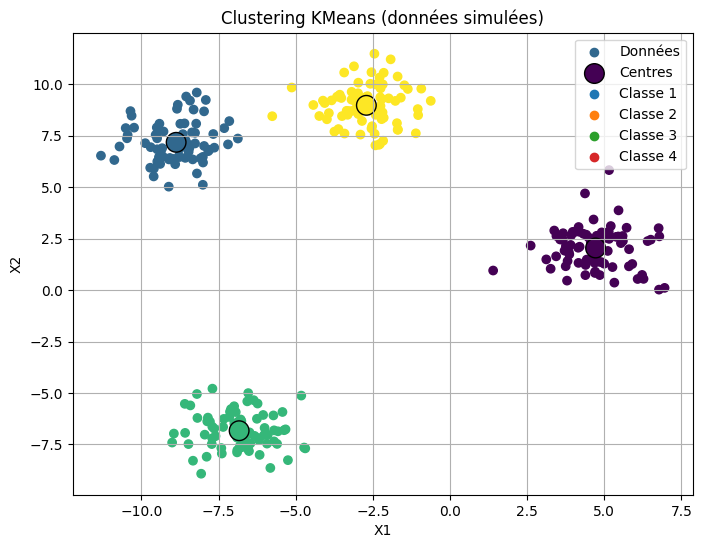

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# Génération de données fictives (simule donclassif.txt)
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=1.0, random_state=42)
don = pd.DataFrame(X, columns=["X1", "X2"])

# Appliquer K-means
km = KMeans(n_clusters=4, n_init=10, random_state=0)
km.fit(don)

# Afficher les noms des attributs de l'objet km (équivalent names(km))
print("Attributs de l'objet KMeans :")
print(km.__dict__.keys())

# Affichage graphique
plt.figure(figsize=(8, 6))
plt.scatter(don["X1"], don["X2"], c=km.labels_, cmap='viridis', label='Données')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
            s=200, c=range(4), marker='o', edgecolors='black', label='Centres')

# Légende
for i in range(4):
    plt.scatter([], [], c='C'+str(i), label=f"Classe {i+1}")
plt.legend(loc='upper right')
plt.title("Clustering KMeans (données simulées)")
plt.xlabel("X1")
plt.ylabel("X2")
plt.grid(True)
plt.show()


### simulation de la donnée

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# Créer les spirales
theta = np.linspace(0, 4 * np.pi, 400)
r = np.linspace(0.5, 5, 400)
x1 = r * np.cos(theta) + 4
y1 = r * np.sin(theta)
spiral1 = np.column_stack((x1, y1))

x2 = r * np.cos(theta + np.pi) + 4
y2 = r * np.sin(theta + np.pi)
spiral2 = np.column_stack((x2, y2))

# Créer les blobs
blobs, _ = make_blobs(n_samples=400, centers=[(0, 0), (0, 5.5)], cluster_std=0.5, random_state=42)
blob1 = blobs[:200]
blob2 = blobs[200:]

# Combiner toutes les données
X = np.vstack((spiral1, spiral2, blob1, blob2))
true_labels = np.array([0]*400 + [1]*400 + [2]*200 + [3]*200)


In [82]:
X = pd.read_table('donclassif.txt', sep=';', decimal='.')
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2800 entries, 0 to 2799
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      2800 non-null   float64
 1   V2      2800 non-null   float64
dtypes: float64(2)
memory usage: 43.9 KB


In [83]:
X= X.to_numpy()

### K-means

In [84]:
km = KMeans(n_clusters=4, n_init=20, random_state=42)
km.fit(X)
pred_labels = km.labels_
centroids = km.cluster_centers_


###  Afficher les résultats

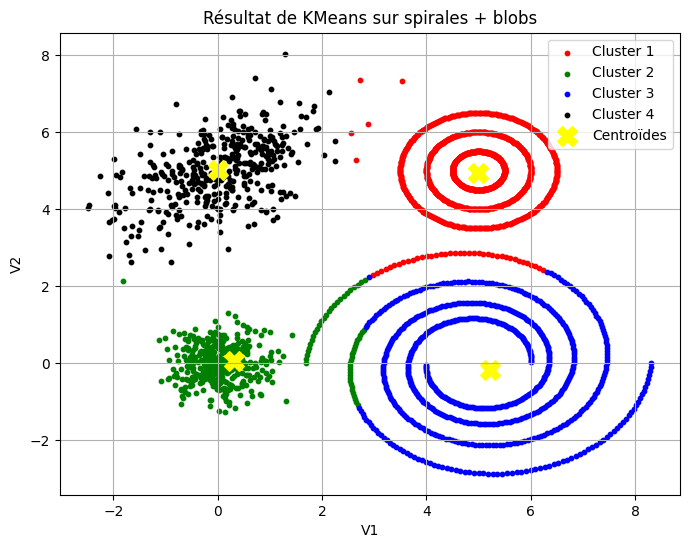

In [85]:
plt.figure(figsize=(8, 6))
colors = ['red', 'green', 'blue', 'black']
for i in range(4):
    plt.scatter(X[pred_labels == i, 0], X[pred_labels == i, 1], s=10, color=colors[i], label=f"Cluster {i+1}")
plt.scatter(centroids[:, 0], centroids[:, 1], c='yellow', s=200, marker='X', label="Centroïdes")
plt.legend()
plt.title("Résultat de KMeans sur spirales + blobs")
plt.xlabel("V1")
plt.ylabel("V2")
plt.grid(True)
plt.show()


### 1. KMeans (pour rappel)

In [86]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, n_init=20, random_state=42)
kmeans_labels = kmeans.fit_predict(X)

###  2. DBSCAN

In [87]:
from sklearn.cluster import DBSCAN

# eps doit être adapté à la densité des points
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X)

### 3.Gaussian Mixture Model

In [90]:
gmm = GaussianMixture(n_components=4, covariance_type="full").fit(X)
labels_gmm = gmm.predict(X)

In [ ]:
sns.scatterplot(data=X,x="V1",y="V2",hue=labels,palette="tab10")

###  4. Visualisation des 2 méthodes

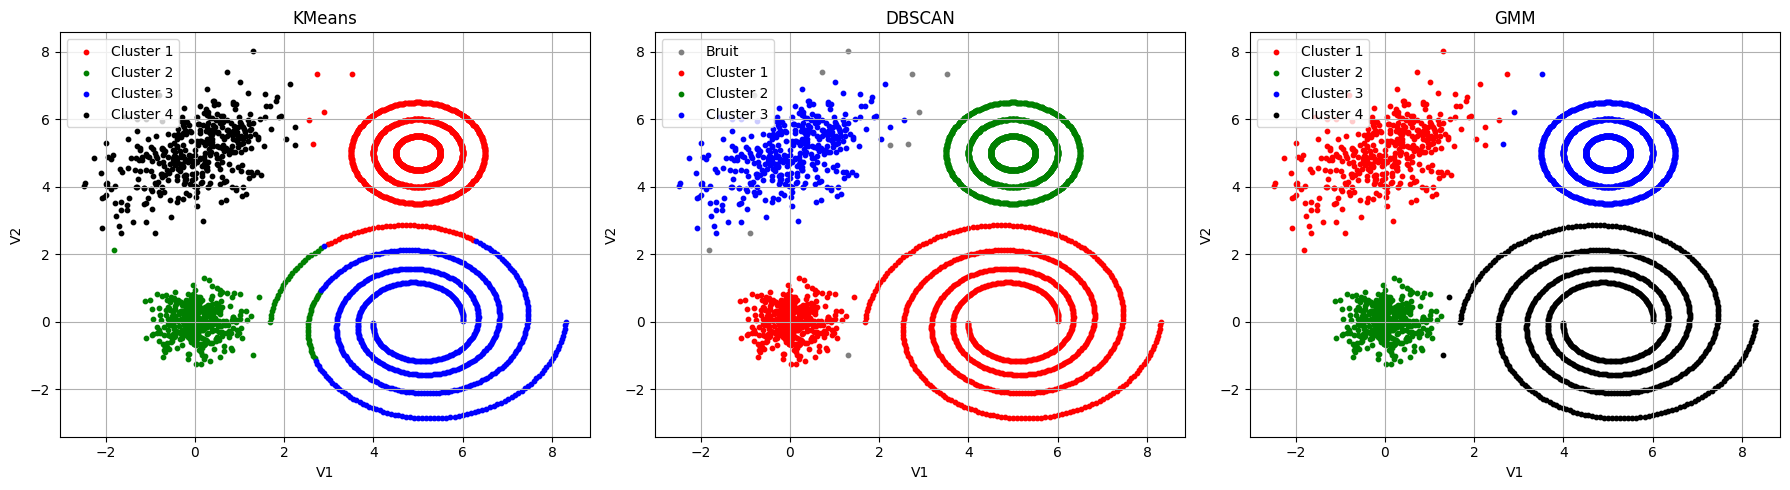

In [92]:
fig, axs = plt.subplots(1, 3, figsize=(18, 5))
titles = ['KMeans', 'DBSCAN','GMM']
labelings = [kmeans_labels, dbscan_labels,labels_gmm]

for ax, labels, title in zip(axs, labelings, titles):
    for i in np.unique(labels):
        if i == -1:
            # Bruit (DBSCAN)
            color = "gray"
            label = "Bruit"
        else:
            color = colors[i % len(colors)]
            label = f"Cluster {i+1}"
        ax.scatter(X[labels == i, 0], X[labels == i, 1], s=10, color=color, label=label)
    ax.set_title(title)
    ax.legend()
    ax.set_xlabel("V1")
    ax.set_ylabel("V2")
    ax.grid(True)

plt.tight_layout()
plt.show()


### Recherche 'meilleur' partition

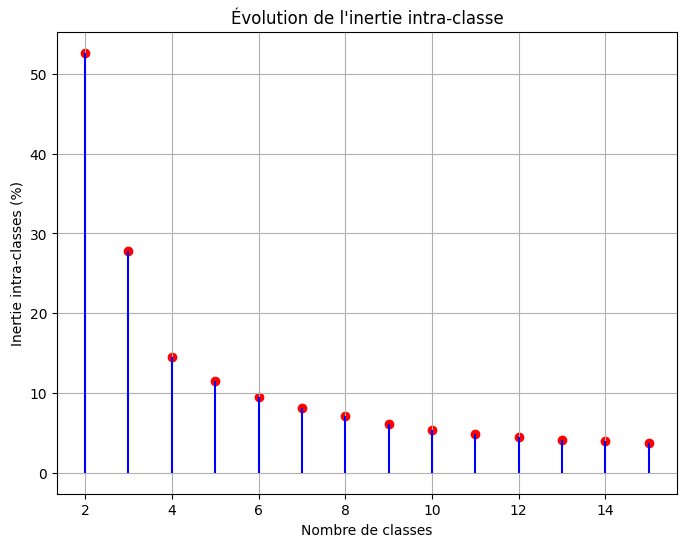

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import pandas as pd

# Chargement des données
don = pd.read_table('donclassif.txt', sep=';', decimal='.')

# Plage des k (nombre de classes) à tester
k_values = range(2, 16)
part = []

# Boucle sur chaque valeur de k
for k in k_values:
    km = KMeans(n_clusters=k, n_init=20, random_state=0).fit(don)
    withinss = km.inertia_  # somme des distances intra-classes
    totss = np.sum(np.var(don, axis=0) * len(don))  # variance totale * n
    part.append(withinss / totss * 100)

# Tracé (type = "h" en R ≈ barres verticales)
plt.figure(figsize=(8, 6))
plt.vlines(k_values, [0], part, colors='blue')
plt.scatter(k_values, part, color='red')
plt.xlabel("Nombre de classes")
plt.ylabel("Inertie intra-classes (%)")
plt.title("Évolution de l'inertie intra-classe")
plt.grid(True)
plt.show()

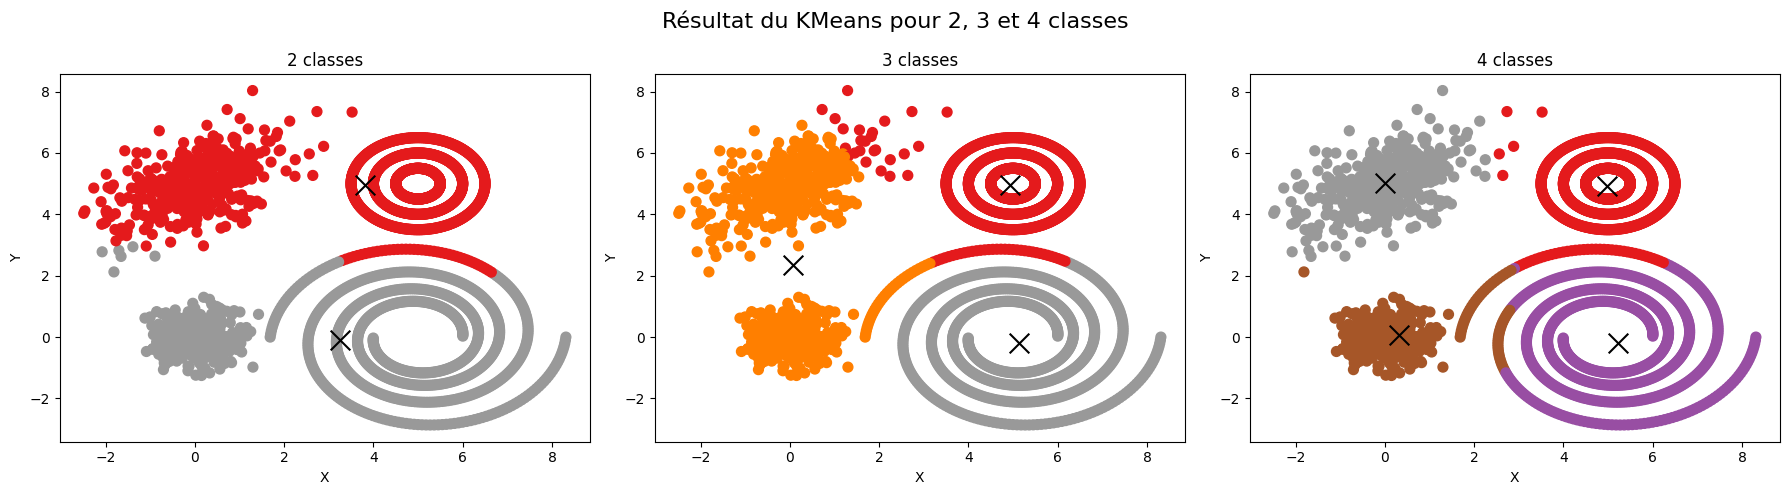

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


# Définir les valeurs de k à tester
ks = [2, 3, 4]

# Affichage des 3 figures
plt.figure(figsize=(18, 5))

for i, k in enumerate(ks, 1):
    km = KMeans(n_clusters=k, n_init=20, random_state=0).fit(don)
    labels = km.labels_
    centers = km.cluster_centers_

    plt.subplot(1, 3, i)
    plt.scatter(don.iloc[:, 0], don.iloc[:, 1], c=labels, cmap='Set1', s=50)
    plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, marker='x')
    plt.title(f"{k} classes")
    plt.xlabel("X")
    plt.ylabel("Y")

plt.suptitle("Résultat du KMeans pour 2, 3 et 4 classes", fontsize=16)
plt.tight_layout()
plt.show()


### 1. PAM (Partitioning Around Medoids) : K-medoids
Utilisable via le package scikit-learn-extra.

In [29]:
from sklearn_extra.cluster import KMedoids
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

# Données simulées
X, _ = make_blobs(n_samples=500, centers=4, random_state=42)

# PAM (K-Medoids)
kmedoids = KMedoids(n_clusters=4, method='pam', random_state=0).fit(X)

# Affichage
plt.scatter(X[:, 0], X[:, 1], c=kmedoids.labels_)
plt.scatter(kmedoids.cluster_centers_[:, 0], kmedoids.cluster_centers_[:, 1],
            c='red', marker='X', s=200, label='Medoids')
plt.title('Clustering avec PAM (KMedoids)')
plt.legend()
plt.show()


ModuleNotFoundError: No module named 'sklearn_extra'

### 2. CLARA (via pyclustering)
Utilisable avec pyclustering – une implémentation plus proche de l’original R.

#### L’algorithme CLARA (Clustering Large Applications) est une extension de l’algorithme PAM (Partitioning Around Medoids), conçu pour gérer des grands jeux de données en utilisant des échantillons aléatoires. 

In [30]:
#pip install pyclustering==0.10.1.2

In [31]:
from pyclustering.cluster.clara import clara
from pyclustering.utils import read_sample
from pyclustering.samples.definitions import SIMPLE_SAMPLES
import matplotlib.pyplot as plt

# Exemple de données
from sklearn.datasets import make_blobs
X, _ = make_blobs(n_samples=1000, centers=4, random_state=42)

# CLARA
initial_medoids = 4  # nombre de clusters
clara_instance = clara(data=X.tolist(), number_clusters=initial_medoids)
clara_instance.process()
clusters = clara_instance.get_clusters()
medoids = clara_instance.get_medoids()

# Affichage
colors = ['red', 'blue', 'green', 'purple', 'orange', 'brown']
for i, cluster in enumerate(clusters):
    cluster_points = [X[idx] for idx in cluster]
    plt.scatter(*zip(*cluster_points), label=f'Cluster {i+1}', color=colors[i % len(colors)])
plt.scatter(*zip(*[X[idx] for idx in medoids]), color='black', marker='x', s=200, label='Medoids')
plt.title('Clustering avec CLARA')
plt.legend()
plt.show()


ModuleNotFoundError: No module named 'pyclustering.cluster.clara'

In [32]:
#pip uninstall pyclustering

### CLARA-like en Python avec KMedoids + échantillonnage

### Voici un équivalent fonctionnel de CLARA en Python sans dépendre de pyclustering

In [33]:
import numpy as np
from sklearn_extra.cluster import KMedoids
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

def clara_like(X, n_clusters=4, n_samples=5, sample_size=100):
    best_score = -1
    best_labels = None
    best_medoids = None

    for i in range(n_samples):
        sample_indices = np.random.choice(len(X), sample_size, replace=False)
        sample = X[sample_indices]

        # Appliquer KMedoids sur l'échantillon
        model_sample = KMedoids(n_clusters=n_clusters, method='pam', random_state=0)
        model_sample.fit(sample)

        # Réutiliser les centroïdes sur tout X
        model_full = KMedoids(n_clusters=n_clusters, method='pam', init=sample[model_sample.medoid_indices_], max_iter=1)
        model_full.fit(X)
        score = silhouette_score(X, model_full.labels_)

        if score > best_score:
            best_score = score
            best_labels = model_full.labels_
            best_medoids = model_full.cluster_centers_

    return best_labels, best_medoids

# Exemple d’utilisation
from sklearn.datasets import make_blobs
X, _ = make_blobs(n_samples=500, centers=4, cluster_std=0.60, random_state=0)

labels, medoids = clara_like(X, n_clusters=4)

# Affichage
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, s=30, cmap='rainbow')
plt.scatter(medoids[:, 0], medoids[:, 1], c='black', s=200, marker='x')
plt.title("Partition via CLARA-like (KMedoids + Échantillons)")
plt.show()


ModuleNotFoundError: No module named 'sklearn_extra'

### 5 méthodes de clustering suivantes sur un jeu de données réelles :

K-means

K-medoids (PAM)

CAH (agglomératif)

DBSCAN

EM (Gaussian Mixture Model)

🔹 Étape 1 : Télécharger un dataset réel Kaggle

📊 Mall Customers – données simples et bien adaptées au clustering.
👉 https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation

Une fois kaggle CLI installé, exécute dans ton terminal :

kaggle datasets download -d vjchoudhary7/customer-segmentation
Puis décompresse l’archive :


unzip customer-segmentation.zip

###  1. Import des librairies

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
#from sklearn_extra.cluster import KMedoids
from scipy.cluster.hierarchy import dendrogram, linkage
import seaborn as sns

### 2. Chargement et préparation des données

In [37]:
X = pd.read_csv("CC GENERAL.csv", sep=",")
X.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [39]:
X_sans_V1 = X.drop(columns=["CUST_ID"])

In [40]:
# Imputation des valeurs manquantes
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
X_sans_V1 = imputer.fit_transform(X_sans_V1)

# Standardisation des données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_sans_V1)


# Réduction pour visualisation
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [41]:
X_pca

array([[-1.68222026, -1.07645061],
       [-1.1382949 ,  2.50647666],
       [ 0.96968401, -0.3835203 ],
       ...,
       [-0.92620364, -1.8107856 ],
       [-2.33655167, -0.65796601],
       [-0.55642216, -0.40046712]])

###  3. Application des 5 algorithmes

In [42]:
# K-means
km = KMeans(n_clusters=4, n_init=10, random_state=0).fit(X_scaled)
labels_kmeans = km.labels_

# K-medoids
#kmedoids = KMedoids(n_clusters=4, method='pam', random_state=0).fit(X_scaled)
#labels_kmedoids = kmedoids.labels_

# CAH (Agglomerative)
cah = AgglomerativeClustering(n_clusters=4, linkage='ward')
labels_cah = cah.fit_predict(X_scaled)

# DBSCAN
dbscan = DBSCAN(eps=0.9, min_samples=5)
labels_dbscan = dbscan.fit_predict(X_scaled)

# EM (Gaussian Mixture)
gmm = GaussianMixture(n_components=4, covariance_type='full', random_state=0)
labels_gmm = gmm.fit_predict(X_scaled)

### 4. Visualisation des résultats

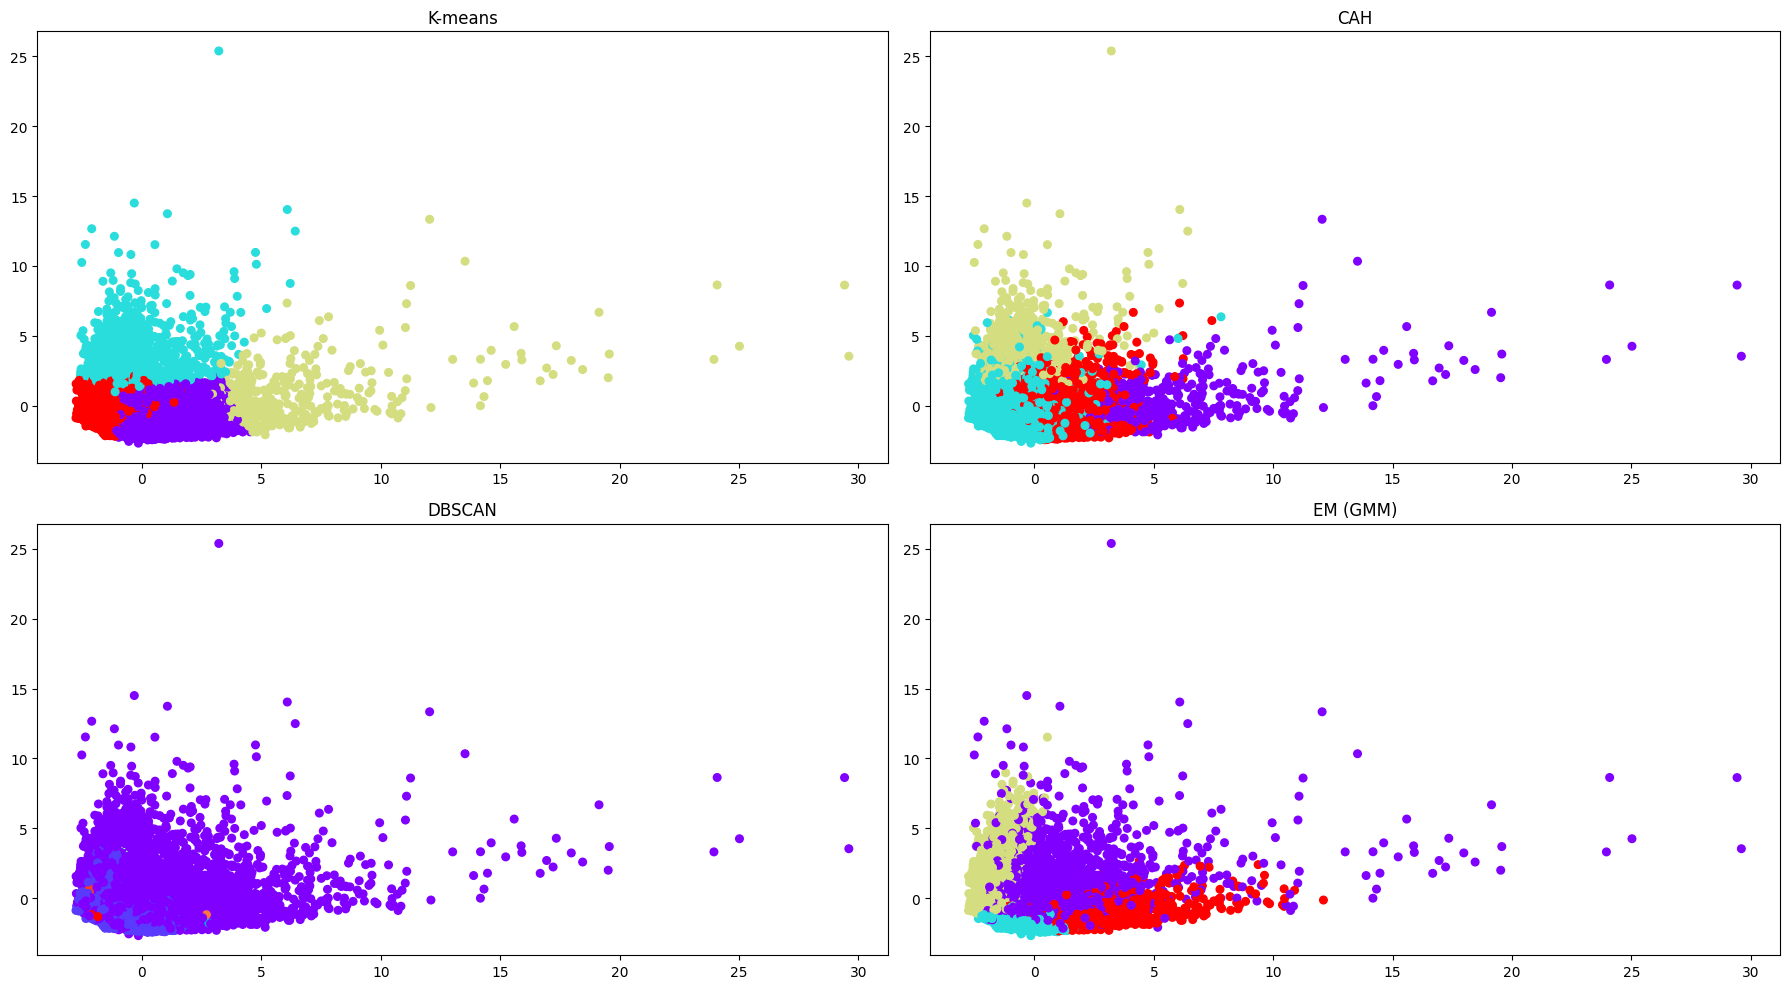

In [43]:
methods = {
    'K-means': labels_kmeans,
    #'K-medoids': labels_kmedoids,
    'CAH': labels_cah,
    'DBSCAN': labels_dbscan,
    'EM (GMM)': labels_gmm
}

fig, axs = plt.subplots(2, 2, figsize=(18, 10))
axs = axs.ravel()

for i, (name, labels) in enumerate(methods.items()):
    axs[i].scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='rainbow', s=30)
    axs[i].set_title(name)

plt.tight_layout()
plt.show()

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage, fcluster
from pyclustering.cluster.kmedoids import kmedoids
from pyclustering.utils import calculate_distance_matrix
import numpy as np

# Chargement des données
df = pd.read_csv('Mall_Customers.csv')
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA pour visualisation
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [67]:
cah_model = AgglomerativeClustering(metric='euclidean', linkage='ward', distance_threshold=0, n_clusters=None)
cah_out = cah_model.fit(X_pca)

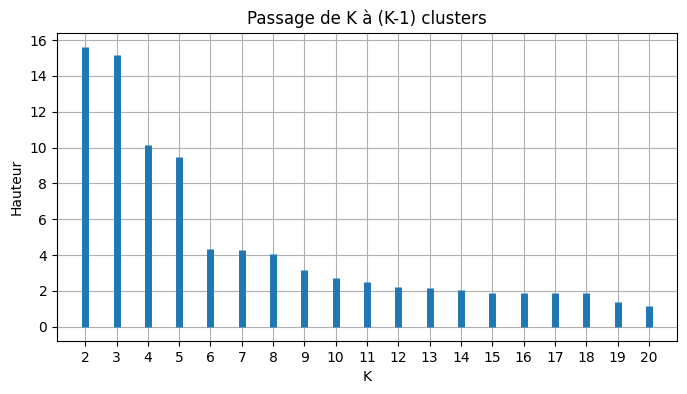

In [68]:
k_max = 20

fig, ax = plt.subplots(figsize=(8, 4))
ax.vlines(range(2, k_max+1), 0, np.flip(np.sort(cah_out.distances_))[0:k_max-1], linewidth=5)
ax.set_xticks(range(2, k_max+1))
ax.grid()
ax.set_xlabel('K')
ax.set_ylabel('Hauteur')
plt.title('Passage de K à (K-1) clusters')
plt.show()

#### On choisit 5 clusters

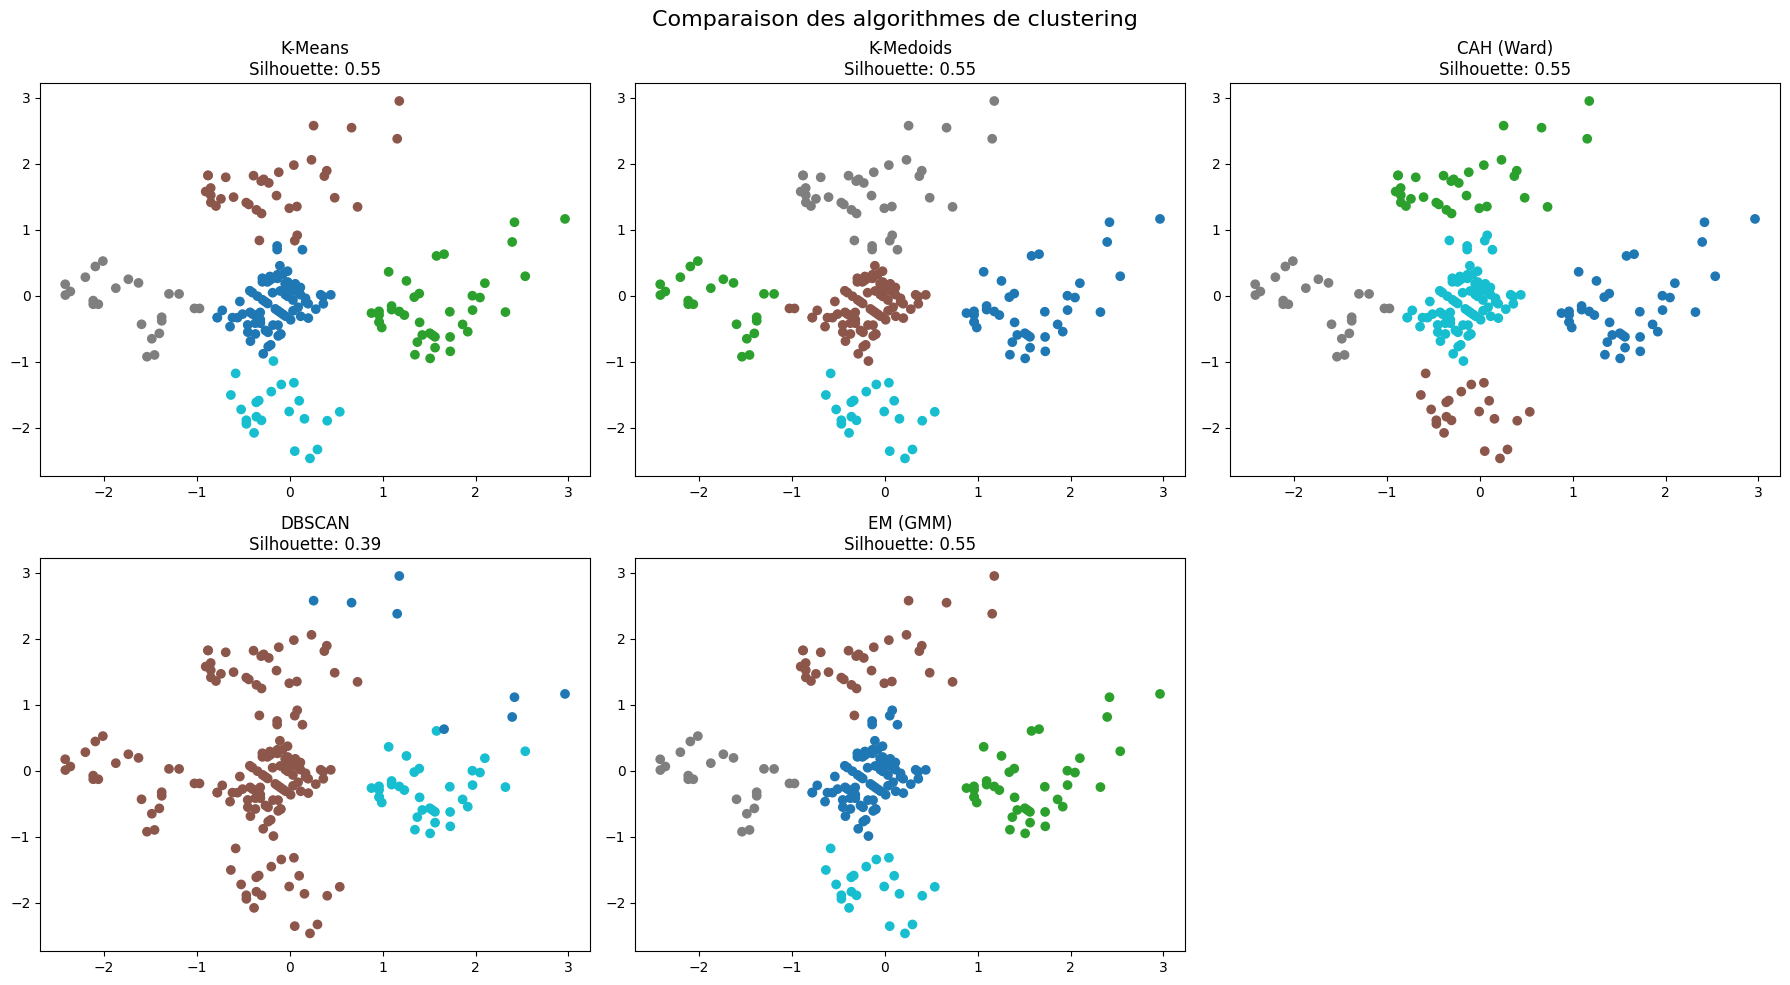

In [69]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

# 1. K-means
kmeans = KMeans(n_clusters=5, random_state=0)
kmeans_labels = kmeans.fit_predict(X_scaled)
axes[0].scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels, cmap='tab10')
axes[0].set_title(f"K-Means\nSilhouette: {silhouette_score(X_scaled, kmeans_labels):.2f}")

# 2. K-medoids
initial_medoids = [0, 10, 20, 30, 40]
distance_matrix = calculate_distance_matrix(X_scaled)
kmedoids_instance = kmedoids(distance_matrix, initial_medoids, data_type='distance_matrix')
kmedoids_instance.process()
kmedoids_clusters = kmedoids_instance.get_clusters()
kmedoids_labels = np.zeros(len(X_scaled))
for idx, cluster in enumerate(kmedoids_clusters):
    kmedoids_labels[cluster] = idx
axes[1].scatter(X_pca[:, 0], X_pca[:, 1], c=kmedoids_labels, cmap='tab10')
axes[1].set_title(f"K-Medoids\nSilhouette: {silhouette_score(X_scaled, kmedoids_labels):.2f}")

# 3. CAH
linkage_matrix = linkage(X_scaled, method='ward')
cah_labels = fcluster(linkage_matrix, 5, criterion='maxclust')
axes[2].scatter(X_pca[:, 0], X_pca[:, 1], c=cah_labels, cmap='tab10')
axes[2].set_title(f"CAH (Ward)\nSilhouette: {silhouette_score(X_scaled, cah_labels):.2f}")

# 4. DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)
if len(set(dbscan_labels)) > 1 and len(set(dbscan_labels)) != 0:
    valid_mask = dbscan_labels != -1
    sil_score = silhouette_score(X_scaled[valid_mask], dbscan_labels[valid_mask])
    axes[3].scatter(X_pca[:, 0], X_pca[:, 1], c=dbscan_labels, cmap='tab10')
    axes[3].set_title(f"DBSCAN\nSilhouette: {sil_score:.2f}")
else:
    axes[3].scatter(X_pca[:, 0], X_pca[:, 1], c='gray')
    axes[3].set_title("DBSCAN\nClusters insuffisants")

# 5. EM (Gaussian Mixture)
em = GaussianMixture(n_components=5, random_state=0)
em_labels = em.fit_predict(X_scaled)
axes[4].scatter(X_pca[:, 0], X_pca[:, 1], c=em_labels, cmap='tab10')
axes[4].set_title(f"EM (GMM)\nSilhouette: {silhouette_score(X_scaled, em_labels):.2f}")

# Figure finale
for i in range(5, 6):
    axes[i].axis('off')  # case vide

plt.suptitle("Comparaison des algorithmes de clustering", fontsize=16)
plt.tight_layout()
plt.show()


### Le score Silhouette indique la qualité de chaque clustering

L’indice de silhouette est une métrique qui permet d’évaluer la qualité d’un clustering. Il mesure dans quelle mesure chaque point est bien regroupé avec ses voisins du même cluster, comparé aux autres clusters.
Règle empirique :

Silhouette moyenne	Qualité du clustering

Silhouette > 0.70	Excellente séparation

0.5 – 0.7	Bonne séparation

0.25 – 0.5	Moyenne, améliorable

< 0.25	Faible, probablement mauvais choix de k ou d'algorithme

### 3. Préparation des données

* <span style="color:green">Colonne	Type</span> ---	<span style="color:red">Description</span> 
---
* <span style="color:green">CustomerID</span> : Numérique	Identifiant unique du client. Ne contient pas d'information utile pour le clustering (souvent à exclure).

* <span style="color:green">Gender</span> :	Catégorielle	Sexe du client (Male / Female). Peut être encodée pour le clustering si pertinent.

* <span style="color:green">Age</span> :	Numérique	Âge du client.

* <span style="color:green"> Annual Income (k\$) </span> : Numérique	Revenu annuel du client en milliers de dollars.

* <span style="color:green">Spending Score (1-100)</span>  : Numérique	Score attribué par le centre commercial en fonction du comportement d’achat et de la fidélité du client (1 = très faible, 100 = très élevé).


In [93]:
from sklearn.preprocessing import StandardScaler
# Chargement des données
df = pd.read_csv('Mall_Customers.csv')
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [94]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### 4. Réduction de dimension pour visualisation

In [71]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)


 ### 5. Application des algorithmes de clustering


### K-means

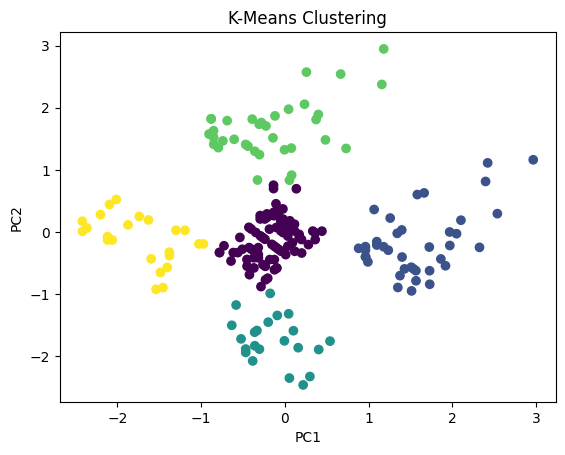

In [72]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, random_state=42)
labels_kmeans = kmeans.fit_predict(X_scaled)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels_kmeans, cmap='viridis')
plt.title("K-Means Clustering")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()


### DBSCAN

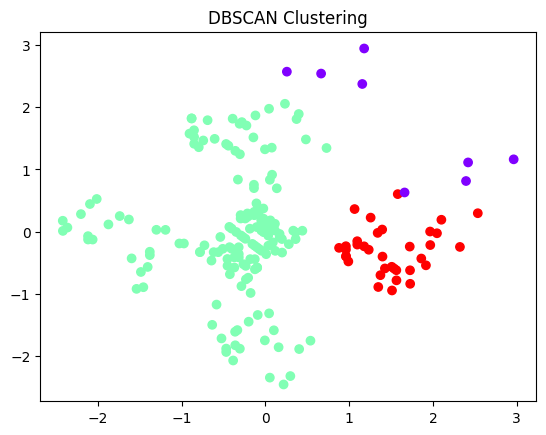

In [102]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.5, min_samples=5)
labels_dbscan = dbscan.fit_predict(X_scaled)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels_dbscan, cmap='rainbow')
plt.title("DBSCAN Clustering")
plt.show()


 ### CAH (Hierarchical Clustering)

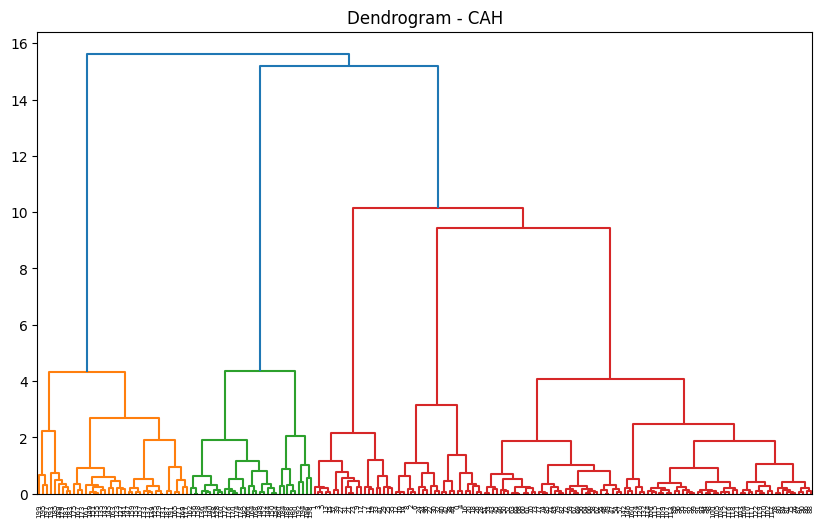

In [74]:
from scipy.cluster.hierarchy import dendrogram, linkage
import scipy.cluster.hierarchy as sch

plt.figure(figsize=(10, 6))
dendrogram(linkage(X_scaled, method='ward'))
plt.title("Dendrogram - CAH")
plt.show()


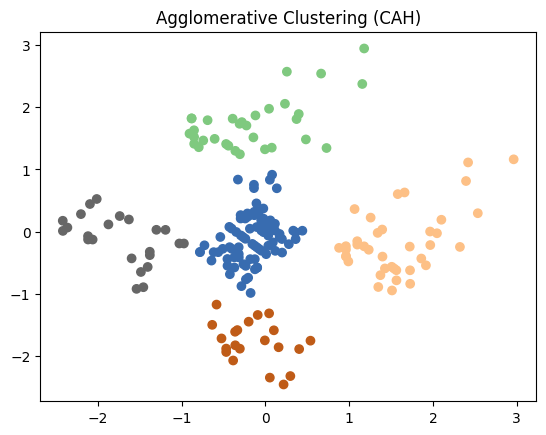

In [75]:
from sklearn.cluster import AgglomerativeClustering

cah = AgglomerativeClustering(n_clusters=5)
labels_cah = cah.fit_predict(X_scaled)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels_cah, cmap='Accent')
plt.title("Agglomerative Clustering (CAH)")
plt.show()


In [76]:
### K-medoids (PAM)

In [77]:
# 2. K-medoids
initial_medoids = [0, 10, 20, 30, 40]
distance_matrix = calculate_distance_matrix(X_scaled)
kmedoids_instance = kmedoids(distance_matrix, initial_medoids, data_type='distance_matrix')
kmedoids_instance.process()
kmedoids_clusters = kmedoids_instance.get_clusters()
kmedoids_labels = np.zeros(len(X_scaled))
for idx, cluster in enumerate(kmedoids_clusters):
    kmedoids_labels[cluster] = idx


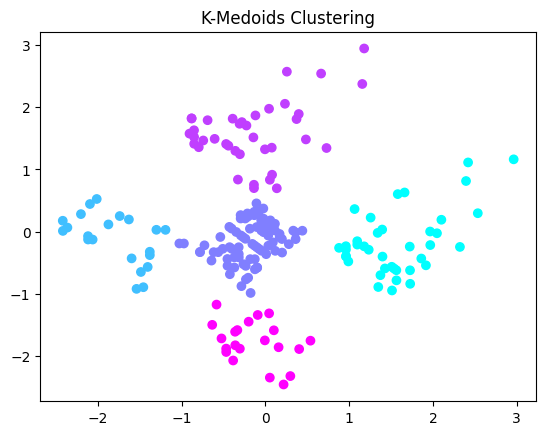

In [78]:
#from sklearn_extra.cluster import KMedoids

#kmedoids = KMedoids(n_clusters=3, random_state=42)
#labels_kmedoids = kmedoids.fit_predict(X_scaled)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmedoids_labels, cmap='cool')
plt.title("K-Medoids Clustering")
plt.show()


###  EM (Gaussian Mixture Model)

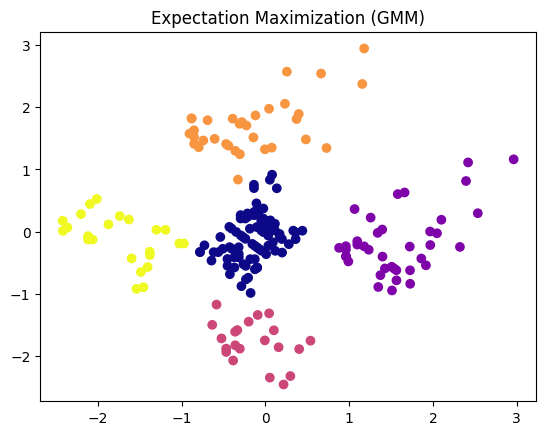

In [79]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=5, random_state=42)
labels_gmm = gmm.fit_predict(X_scaled)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels_gmm, cmap='plasma')
plt.title("Expectation Maximization (GMM)")
plt.show()


### 6. Évaluation des clusters par la silhouette

In [80]:
from sklearn.metrics import silhouette_score

print("Silhouette K-means :", silhouette_score(X_scaled, labels_kmeans))
print("Silhouette K-medoids :", silhouette_score(X_scaled, kmedoids_labels))
print("Silhouette GMM :", silhouette_score(X_scaled, labels_gmm))
print("Silhouette CAH :", silhouette_score(X_scaled, labels_cah))
print("Silhouette DBSCAN :", silhouette_score(X_scaled, labels_dbscan) if len(set(labels_dbscan)) > 1 else "N/A (1 seul cluster)")


Silhouette K-means : 0.5546571631111091
Silhouette K-medoids : 0.554148927884494
Silhouette GMM : 0.5536892843811245
Silhouette CAH : 0.5538089226688662
Silhouette DBSCAN : 0.35044619989666004


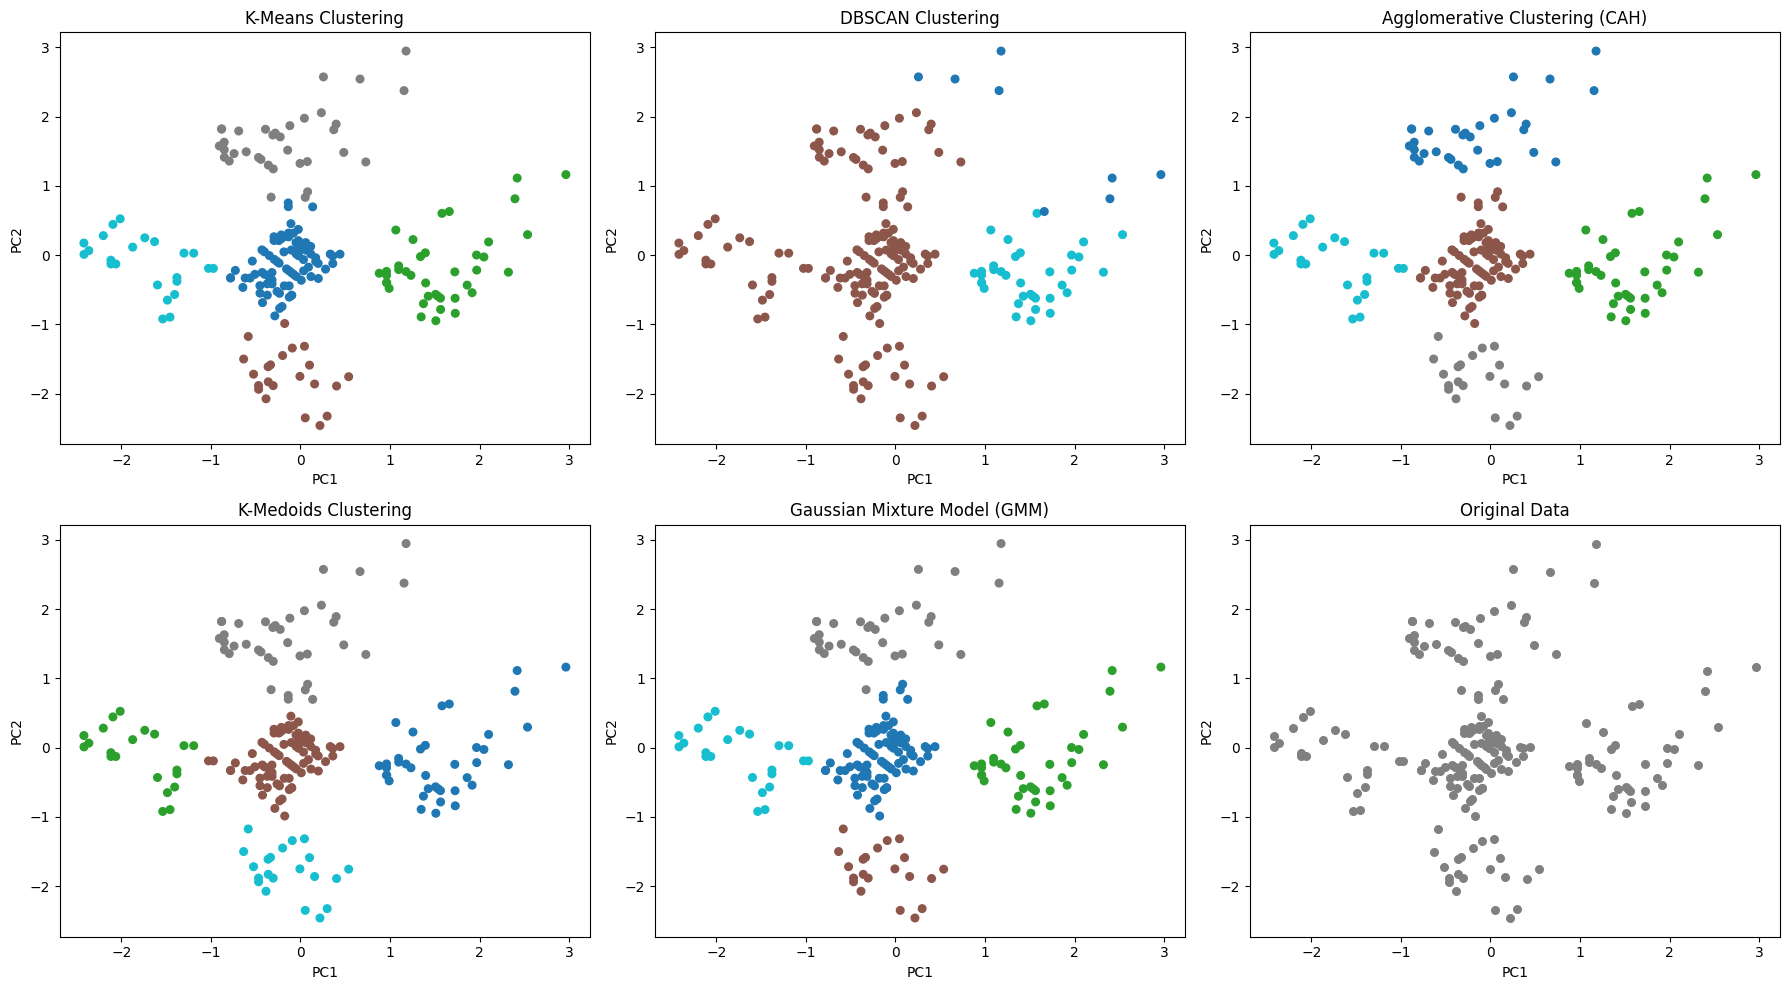

In [81]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

titles = [
    "K-Means Clustering",
    "DBSCAN Clustering",
    "Agglomerative Clustering (CAH)",
    "K-Medoids Clustering",
    "Gaussian Mixture Model (GMM)",
    "Original Data"
]

# Données à afficher
clusterings = [
    labels_kmeans,
    labels_dbscan,
    labels_cah,
    #labels_kmedoids,
    kmedoids_labels,
    labels_gmm,
    None  # original data sans clustering
]

# Affichage
for i, ax in enumerate(axes):
    if clusterings[i] is not None:
        ax.scatter(X_pca[:, 0], X_pca[:, 1], c=clusterings[i], cmap='tab10', s=30)
    else:
        ax.scatter(X_pca[:, 0], X_pca[:, 1], color='gray', s=30)
    ax.set_title(titles[i])
    ax.set_xlabel("PC1")
    ax.set_ylabel("PC2")

plt.tight_layout()
plt.show()
